# Calories Burned Prediction - Exploratory Data Analysis (EDA)

This notebook explores the datasets `exercise.csv` and `calories.csv` to understand data distributions, check for missing values, and visualize relationships between features and the target variable (`Calories`).

All analysis uses **Python standard libraries** and **pandas**.


### Load libraries & data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
exercise = pd.read_csv("../data/exercise.csv")
calories = pd.read_csv("../data/calories.csv")

# Merge datasets
df = exercise.merge(calories, on="User_ID", how="inner")
df.head()



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


### Quick overview

* Data shape

In [25]:
print("Dataset shape:", df.shape)

Dataset shape: (15000, 9)


* Data types

In [26]:
print("\nData types:\n", df.dtypes)


Data types:
 User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object


* Check missing values

In [27]:
print("\nMissing values:\n", df.isna().sum())



Missing values:
 User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


* Descriptive statistics

In [28]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Categorical feature analysis

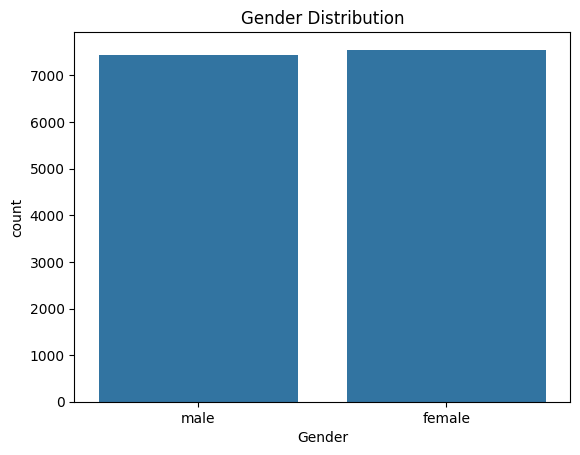

In [21]:
# Gender distribution
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()


### Continuous feature analysis

* Histograms


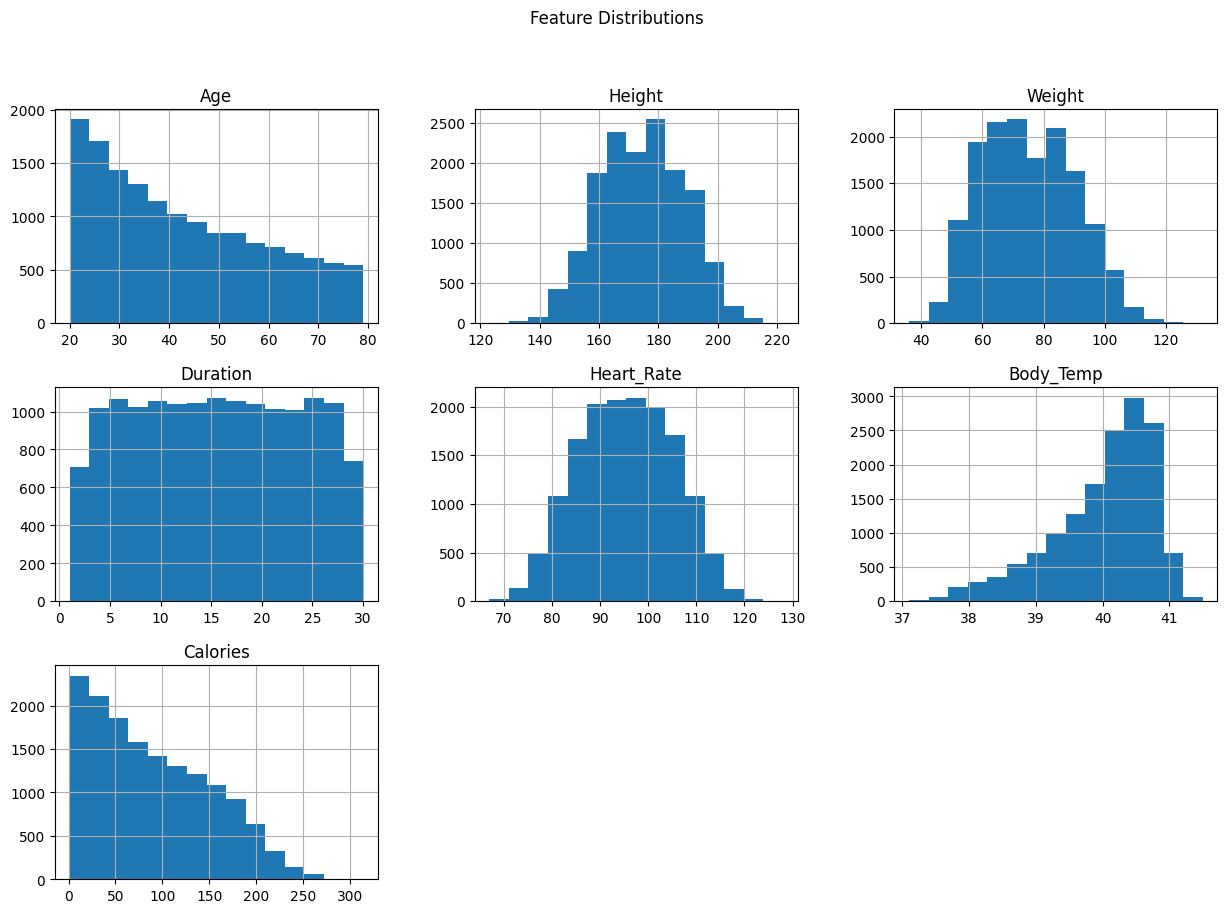

In [29]:
df[['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']].hist(bins=15, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()


### Correlation analysis

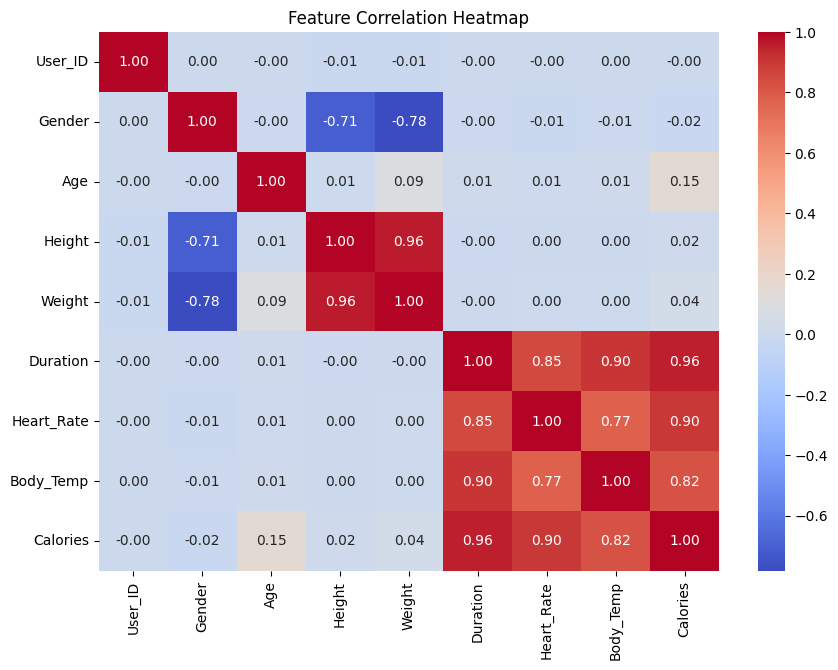

In [31]:
# Encode Gender to numeric first
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'male': 0, 'female': 1})

# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## Feature-target relationship

* Scatter plots for numeric features vs Calories


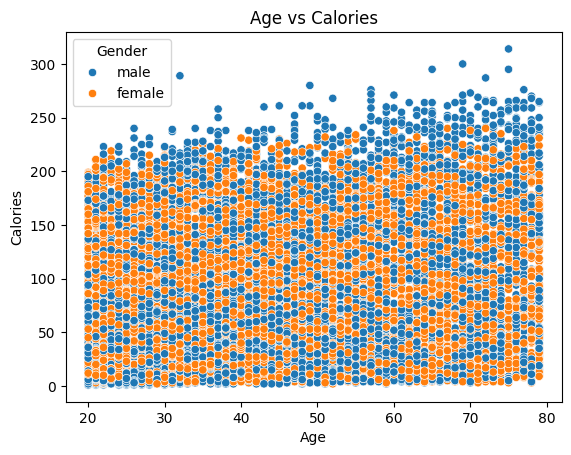

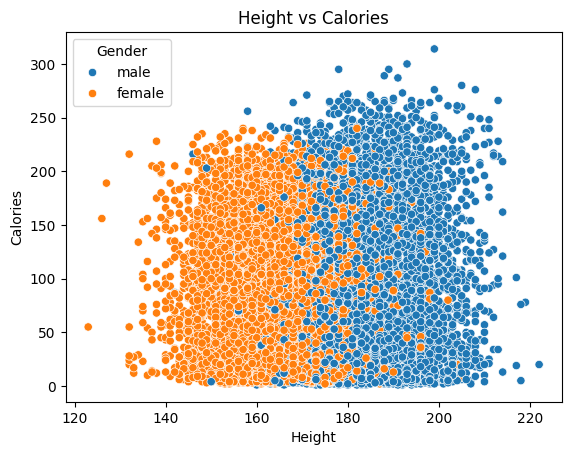

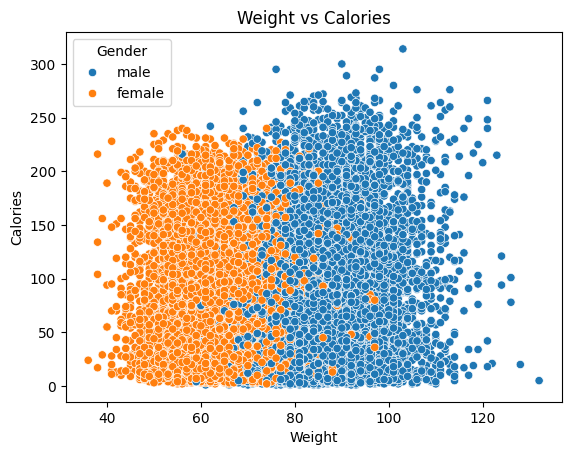

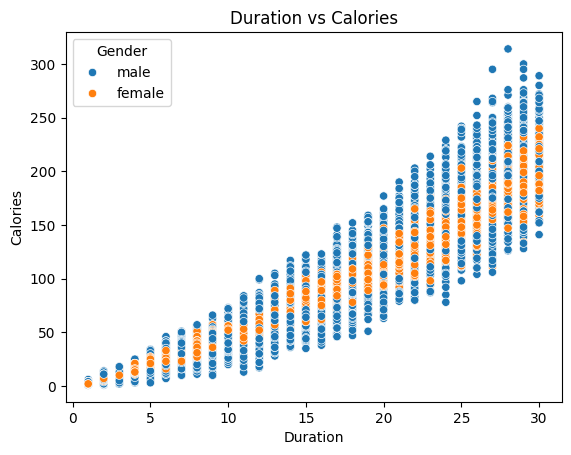

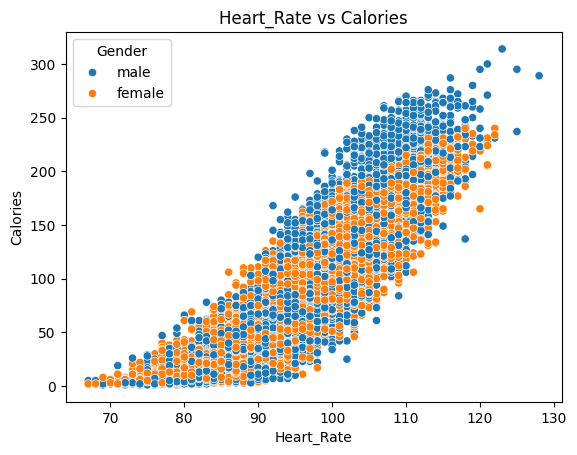

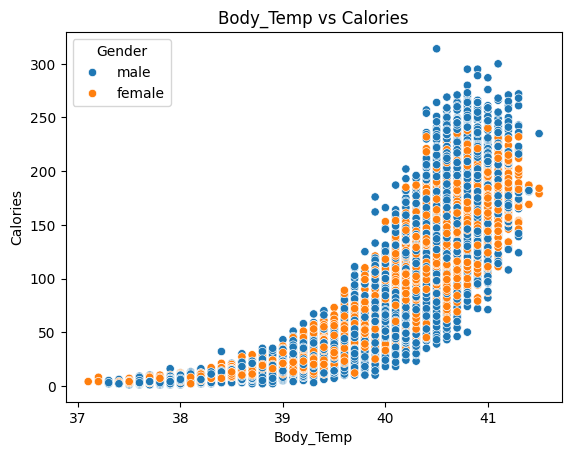

In [32]:
features = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']

for col in features:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['Calories'], hue=df['Gender'])
    plt.title(f"{col} vs Calories")
    plt.show()


# Observations

- Most participants are evenly split between male and female.
- Features like Duration, Weight, Heart Rate show a visible relationship with Calories.
- Age and Body Temperature have weaker correlation with Calories.
- No missing values in the dataset.
- Distributions indicate some features may benefit from scaling or polynomial expansion.
